In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import yfinance as yf
import datetime
    
# using now() to get current time
current_time = datetime.datetime.now()
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aapl-test/stock_test.csv
/kaggle/input/aapl-data/stock_data.csv


In [2]:
#fist step is to load the data from yfinance api 
data='/kaggle/input/aapl-data/stock_data.csv'
stock_data=pd.read_csv(data,index_col='Price')
stock_data=stock_data.iloc[2:]
stock_data.index.names = ['Date']
stock_data = stock_data.astype(float)
stock_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400.0
2020-01-03,72.009140,72.771768,71.783985,71.941351,146322800.0
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200.0
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000.0
2020-01-08,73.403664,73.706294,71.943774,71.943774,132079200.0


In [3]:
#now to split the date into training and validation sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def preprocess_data(stock_data,target_column='Close',test_size=0.2):
    #separate it into features and labels
    X=stock_data.drop([target_column], axis=1) #features
    y=stock_data[target_column] #label
    #perform the train valid split
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=test_size,random_state=0)
    return X_train, X_valid, y_train, y_valid

X_train, X_valid, y_train, y_valid = preprocess_data(stock_data)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#now lets define the model
def build_model(dropout_ratio,act_func):
#define layers with unit and their activation function,
#add dropout ratio to prevent overfitting
    model= keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(1024, activation=act_func),
    layers.Dropout(dropout_ratio),
    layers.BatchNormalization(),
    layers.Dense(512, activation=act_func),
    layers.Dropout(dropout_ratio),
    layers.BatchNormalization(),
    layers.Dense(256, activation=act_func),
    layers.Dropout(dropout_ratio),
    layers.BatchNormalization(),    
    layers.Dense(1,activation='linear')
    ])
##select the type of loss and optimizer
    model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mean_absolute_error']
    )
    return model

model=build_model(0.3,'relu')

Now to compile and fit the model

In [5]:
from keras.callbacks import EarlyStopping
#fit the model for training
def train_model(model,X_train, y_train, X_valid, y_valid,epochs=50, batch_size=32):
    history=model.fit(
        x=X_train,
        y= y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose="auto",
        validation_data=(X_valid,y_valid),
    )
    return history

history = train_model(model, X_train, y_train, X_valid, y_valid)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 24679.7109 - mean_absolute_error: 153.1412 - val_loss: 17200.2812 - val_mean_absolute_error: 127.6627
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23814.7520 - mean_absolute_error: 152.1000 - val_loss: 18451.6777 - val_mean_absolute_error: 132.4434
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23392.7871 - mean_absolute_error: 151.7611 - val_loss: 18651.3027 - val_mean_absolute_error: 133.3573
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22245.9648 - mean_absolute_error: 148.6397 - val_loss: 18241.7305 - val_mean_absolute_error: 132.1667
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21068.2832 - mean_absolute_error: 144.8230 - val_loss: 17589.9824 - val_mean_absolute_error: 130.0422
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20207.0742 - mean_absolute_error: 141.7002 - val_loss: 17001.2109 - val_mean_absolute_error: 127.8659
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━

Now to plot the loss land val_loss graphs with accuracy graphs 

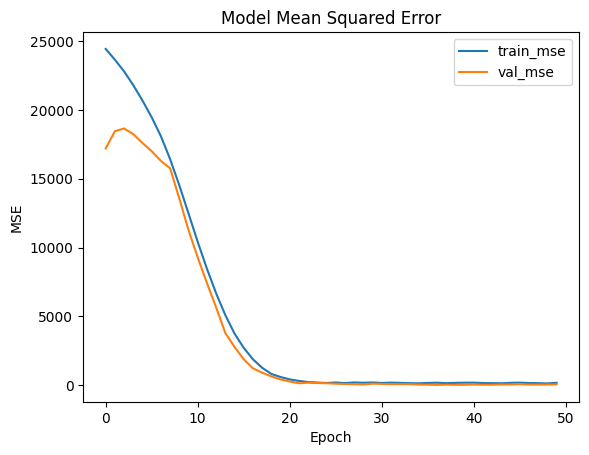

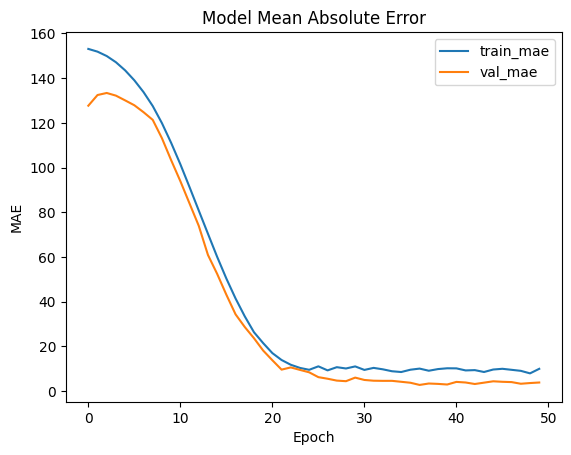

In [6]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    """
    Plots the training history for loss and accuracy.
    
    Parameters:
    history: Training history from model training.
    """
    # Plot loss
    plt.plot(history.history['loss'], label='train_mse')
    plt.plot(history.history['val_loss'], label='val_mse')
    plt.title('Model Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

    # Plot mean squared error (accuracy)
    plt.plot(history.history['mean_absolute_error'], label='train_mae')
    plt.plot(history.history['val_mean_absolute_error'], label='val_mae')
    plt.title('Model Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

plot=plot_training_history(history)


Now to predict and check the model using test data 

In [7]:

def evaluate_model(model, X_test, y_test,current_time):
    """
    Parameters:
    model: Keras model.
    X_test (ndarray): Test features.
    y_test (ndarray): Test labels.
    """
    # Evaluate the model on the test data
    test_mse, test_mae = model.evaluate(X_test, y_test)
    
    print(f"Test Mean Squared Error:",round(test_mse,2))
    print(f"Test Loss:",round(test_mae,2))
    return round(test_mse,2), round(test_mae,2)
    
deta='/kaggle/input/aapl-test/stock_test.csv'
stock_test=pd.read_csv(data,index_col='Price')
stock_test=stock_test.iloc[2:]
stock_test.index.names = ['Date']
stock_test = stock_data.astype(float)
X_test=stock_test.drop(['Close'],axis=1)
y_test=stock_test['Close']
test_loss, test_mse = evaluate_model(model, X_test, y_test,current_time)



40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105.5124 - mean_absolute_error: 6.5425 
Test Mean Squared Error: 53.79
Test Loss: 4.3
